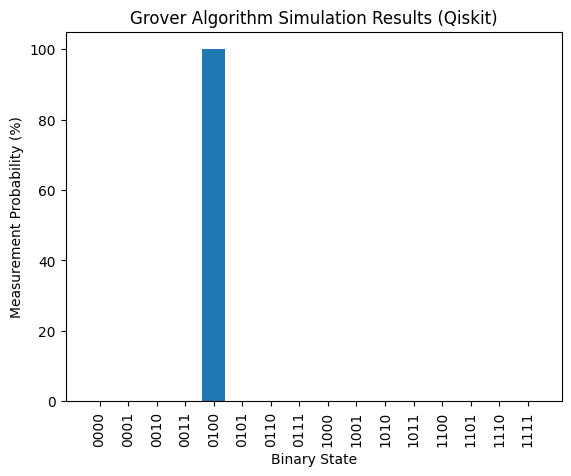

In [5]:
#-----------------------------------------------------------------------------
# Step 1) To generate the Grover algorithm and find the state |0100⟩ across five distinct frameworks,
# our initial step involves importing the five essential quantum libraries:
# Qiskit, Pyquil, Cirq, Pennylane, and Braket
#-----------------------------------------------------------------------------

from quantumgateway.quantum_circuit import QuantumCircuit, QuantumGate
from quantumgateway.quantum_translator.braket_translator import BraketTranslator
from quantumgateway.quantum_translator.cirq_translator import CirqTranslator
from quantumgateway.quantum_translator.qiskit_translator import QiskitTranslator
from quantumgateway.quantum_translator.pennylane_translator import PennyLaneTranslator
from quantumgateway.quantum_translator.pyquil_translator import PyQuilTranslator
from quantumgateway.main import translate_to_framework, simulate_circuit

import math

#-----------------------------------------------------------------------------
#Assigning Constants:
#-----------------------------------------------------------------------------
pi = math.pi
#---------------------------------------------------------------------------------------------------------
# Step 2) Once this is done, we will create a circuit with four qubits and two classical bits, as follows:
#---------------------------------------------------------------------------------------------------------
circuit = QuantumCircuit(4, 4)
#---------------------------------------------------------------------------------------------------------
# we have create a quantum register with 4 qubits and create a classical register with 2 bits,
# and both register are included in the quantum circuit "QuantumCircuit".

# Step 3) Once our registers are ready, we can start adding the specific gates to build our circuit.
#----------------------------------------------------------------------------------------------------------
# we can start apply of an Oracle targeting the state |0100⟩
#---------------------------------------------------------------------------------------------------------
def apply_oracle(circuit):
    pi = math.pi
    # Flip the sign of the amplitude for the target state |0100|
    circuit.add_gate(QuantumGate("x", [0]))
    circuit.add_gate(QuantumGate("x", [1]))
    circuit.add_gate(QuantumGate("cz", [0, 1]))
    circuit.add_gate(QuantumGate("x", [3]))
    circuit.add_gate(QuantumGate("cz", [2, 3]))

# Function to add the amplification operator
def apply_amplification(circuit):

    # Sequence of gates for the amplification operator
    pi = math.pi
    circuit.add_gate(QuantumGate("x", [0]))
    circuit.add_gate(QuantumGate("x", [1]))
    circuit.add_gate(QuantumGate("h", [2]))
    circuit.add_gate(QuantumGate("x", [3]))
    circuit.add_gate(QuantumGate("h", [0]))
    circuit.add_gate(QuantumGate("h", [1]))
    circuit.add_gate(QuantumGate("x", [2]))
    circuit.add_gate(QuantumGate("h", [3]))
    circuit.add_gate(QuantumGate("x", [0]))
    circuit.add_gate(QuantumGate("x", [1]))
    circuit.add_gate(QuantumGate("x", [3]))
    circuit.add_gate(QuantumGate("cz", [0, 1]))
    circuit.add_gate(QuantumGate("cz", [2, 3]))


# Apply Hadamard gates for initialization
for i in range(4):
    circuit.add_gate(QuantumGate("h", [i]))

# Apply Oracle and amplification operator
apply_oracle(circuit)
apply_amplification(circuit)

# Apply X and Hadamard gates again
for i in range(4):
    circuit.add_gate(QuantumGate("x", [i]))
    circuit.add_gate(QuantumGate("h", [i]))

# Measurement of the qubits
for i in range(4):
    circuit.add_gate(QuantumGate("measure", [i, i]))

# Simulate the circuit and print the result
selected_framework = 'qiskit'  # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
print("The results of our simulated circuit are: ")
translated_circuit.print_circuit()

# Finally, we simulate the circuit
import matplotlib.pyplot as plt

# Simulate the circuit and print the result
print("The results of our simulated circuit are: ")
counts = simulate_circuit(circuit, selected_framework)
print(counts)

# Convert counts to percentages
total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

# Plotting the histogram with percentages on the x-axis
all_states = [format(i, '04b') for i in range(2**4)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('Grover Algorithm Simulation Results (Qiskit)')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()

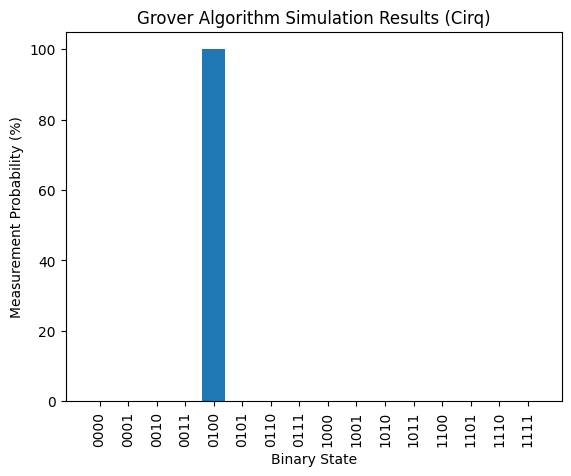

In [6]:
# If we want to obtain the result from any of the following quantum frameworks instead of qiskit: cirq, pennylane, pyquil, amazonbraket,
# let's choose Google's Cirq. In this case, the quantum circuit is given by
selected_framework = 'cirq' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

# Finally, we simulate the circuit
import matplotlib.pyplot as plt

# Simulate the circuit and print the result

# and the visualization of the results are 
print("The results of our simulated circuit are: ")
counts = simulate_circuit(circuit, selected_framework)
print(counts)

# Convert counts to percentages
total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

# Plotting the histogram with percentages on the x-axis
all_states = [format(i, '04b') for i in range(2**4)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('Grover Algorithm Simulation Results (Cirq)')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()

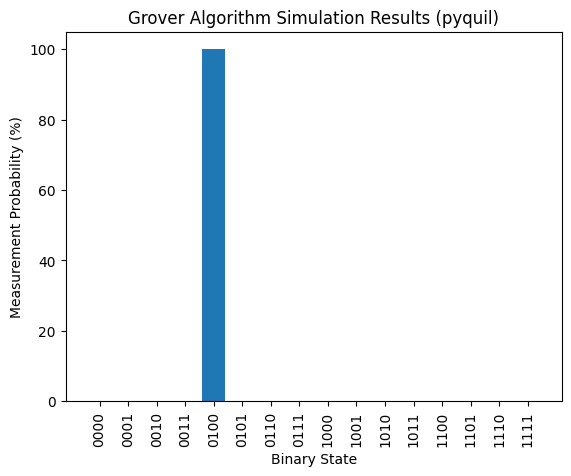

In [7]:
# we can proceed to see how the quantum circuit looks like in Rigetti's PyQuil 
selected_framework = 'pyquil' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

print("The results of our simulated circuit are: ")
print(counts)

# Finally, we simulate the circuit
import matplotlib.pyplot as plt


# Convert counts to percentages
total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

# Plotting the histogram with percentages on the x-axis
all_states = [format(i, '04b') for i in range(2**4)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('Grover Algorithm Simulation Results (pyquil)')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()

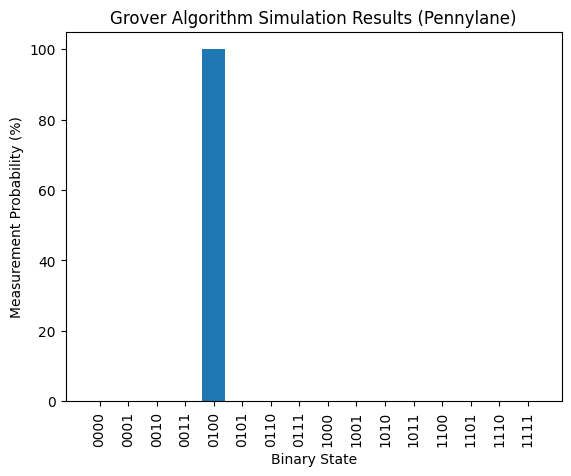

In [8]:
# we can proceed to see how the quantum circuit looks like in Xanadu's PennyLane
selected_framework = 'pennylane' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

# and the visualization of the results are 
print("The results of our simulated circuit are: ")
counts = simulate_circuit(circuit, selected_framework)
print(counts)

# Finally, we simulate the circuit
import matplotlib.pyplot as plt

# Simulate the circuit and print the result
print("The results of our simulated circuit are: ")
counts = simulate_circuit(circuit, selected_framework)
print(counts)

# Convert counts to percentages
total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

# Plotting the histogram with percentages on the x-axis
all_states = [format(i, '04b') for i in range(2**4)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('Grover Algorithm Simulation Results (Pennylane)')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()

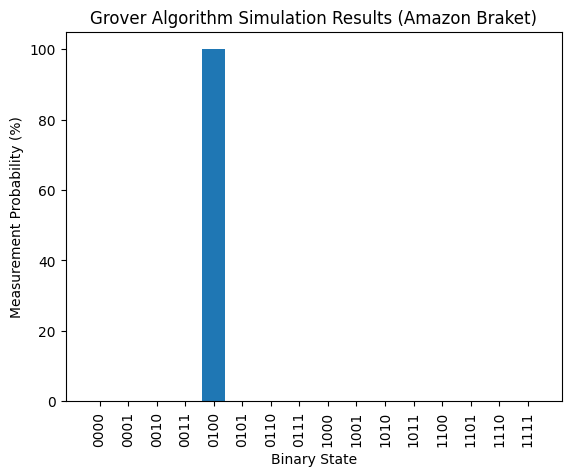

In [9]:
# and finaly Amazon's Braket
selected_framework = 'amazonbraket' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

# and the visualization of the results are 
print("The results of our simulated circuit are: ")
counts = simulate_circuit(circuit, selected_framework)
print(counts)

# Finally, we simulate the circuit
import matplotlib.pyplot as plt

# Simulate the circuit and print the result
print("The results of our simulated circuit are: ")
counts = simulate_circuit(circuit, selected_framework)
print(counts)

# Convert counts to percentages
total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

# Plotting the histogram with percentages on the x-axis
all_states = [format(i, '04b') for i in range(2**4)]
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('Grover Algorithm Simulation Results (Amazon Braket)')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()

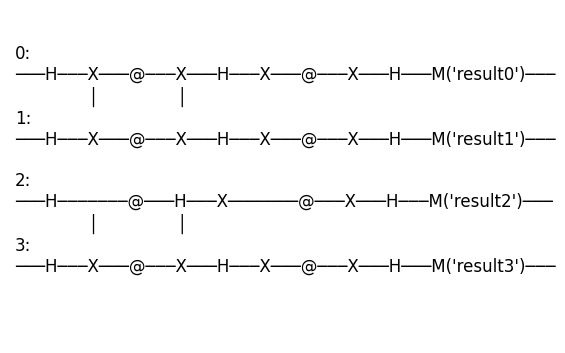

In [10]:
# The following is to save the circuit of each platform in an image

from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
import io
import sys

# Redirect the standard output to a string buffer
stdout = sys.stdout
sys.stdout = io.StringIO()

selected_framework = 'cirq' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

# and the visualization of the results are 
#print("The results of our simulated circuit are: ")
#print(counts)

printed_circuit = sys.stdout.getvalue()

# Restore the standard output
sys.stdout = stdout
# Define the bbox
bbox = {'width': 100, 'height': 100}

# Save the printed circuit as an image with its exact size
plt.figure(figsize=(bbox['width'] / 50, bbox['height'] / 200), dpi=100)  # Convert from points to inches
plt.text(0.03, 0.1, printed_circuit, ha='left', va='top', wrap=True, fontsize=12)
plt.axis('off')
plt.savefig("Grover_algoritm_4_qubits.jpg", bbox_inches='tight', pad_inches=0, dpi=100)

# Show the image
plt.show()

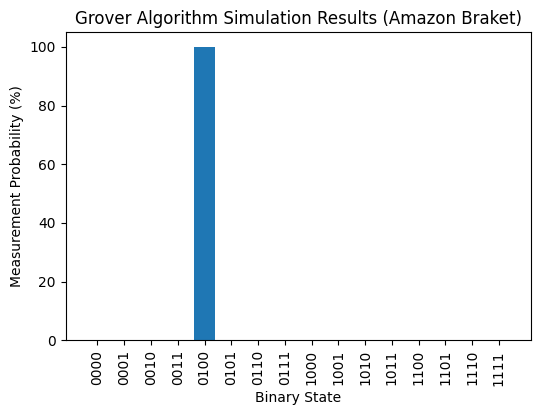

In [11]:
# and the following code is to save the image from the histogram

# Convert counts to percentages
total_shots = sum(counts.values())
percentage_counts = {state: count / total_shots * 100 for state, count in counts.items()}

# Plotting the histogram with percentages on the x-axis
all_states = [format(i, '04b') for i in range(2**4)]
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.bar(all_states, [percentage_counts.get(state, 0) for state in all_states])
plt.xlabel('Binary State')
plt.ylabel('Measurement Probability (%)')
plt.title('Grover Algorithm Simulation Results (Amazon Braket)')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.savefig("measurement_probabilities.jpg", bbox_inches='tight', pad_inches=0.1)
plt.show()